# Ev Fiyat Tahmini
Bu proje, çeşitli ev özelliklerini kullanarak, evlerin satış fiyatlarını tahmin etmek amacıyla makine öğrenmesi tekniklerini kullanmayı hedeflemektedir. Kullanılacak veri seti, farklı ev özelliklerinin (örneğin, evin tipi, büyüklüğü, yapım yılı gibi) yanı sıra, evin satış fiyatını içeren 13 özellikten oluşmaktadır. Bu proje, makine öğrenmesi modelleri ve regresyon tekniklerini kullanarak, verilen ev bilgilerine dayanarak doğru fiyat tahminleri yapmayı amaçlamaktadır.

Veri seti aşağıdaki 13 kolondan oluşmaktadır:
* **Id** : Her ev satışını tanımlamak için oluşturulmuş benzersiz kimlik numarasıdır.
  
* **MSSubClass**: Satın alınan evin türünü belirtir.
* **MSZoning**: Satın alınan evin hangi genel bölgeleme sınıfına ait olduğunu belirtir. Örneğin, evin ticari bir bölgede mi yoksa konut bölgesinde mi olduğunu tanımlar.
* **LotArea**:Evin bulunduğu arazinin büyüklüğünü (metrekare cinsinden) belirtir. Bu, evin değerini etkileyen önemli bir faktördür; çünkü büyük arsa genellikle daha yüksek bir fiyatla ilişkilidir.
* **LotConfig**:Arazinin konfigürasyonunu açıklar. Örneğin, bir köşe arsası mı, merkezi bir arsada mı bulunuyor, gibi.
* **BldgType**:Satın alınan evin bina tipini belirtir. Bu özellik, evin tekil mi yoksa çoklu daireli bir bina mı olduğunu gösterir.
* **OverallCond**:Evin genel durumunu derecelendiren bir özellik. Bu özellik, evin bakım durumu ve genel fiziki koşulları hakkında bilgi verir.
* **YearBuilt**:Evin ilk inşa edildiği yılı belirtir. Genelde, daha eski evler daha düşük bir fiyatla satılabilirken, yeni evler daha pahalı olabilir.
* **YearRemodAdd**:Evin sonradan yenilenip yenilenmediğini ve yenileme tarihini belirtir. Eğer evde ek bir tadilat yapılmışsa, bu evin değerini artırabilir.
* **Exterior1st**:Evin dış cephe kaplamasını belirtir. Bu, evin dış yüzeyinin hangi malzemeden yapıldığını gösterir (örneğin, tuğla, ahşap, vb.).
* **BsmtFinSF2**:Yerin ikinci tip bitmiş alanını (örneğin, bodrum katı gibi) belirtir. Bu özellik, evin iç alanının büyüklüğünü artırabilir.
* **TotalBsmtSF**:Evin bodrum alanının toplam büyüklüğünü belirtir. Bodrum katı, evin toplam değerini etkileyebilecek bir faktördür.
* **SalePrice**:Bu, tahmin etmek istediğiniz hedef özelliktir. Evlerin satış fiyatlarını içerir. Bu veri kümesindeki diğer özelliklerle ilişkili olarak evlerin fiyatlarını tahmin etmek için kullanılır.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_excel(r"C:\Users\dilar\Veri Analizi Projeleri\Makine Öğrenmesi ile Ev Fiyatı Tahmini\data\HousePricePrediction.xlsx")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


 ## EDA(Exploratory Data Analysis)

<Axes: >

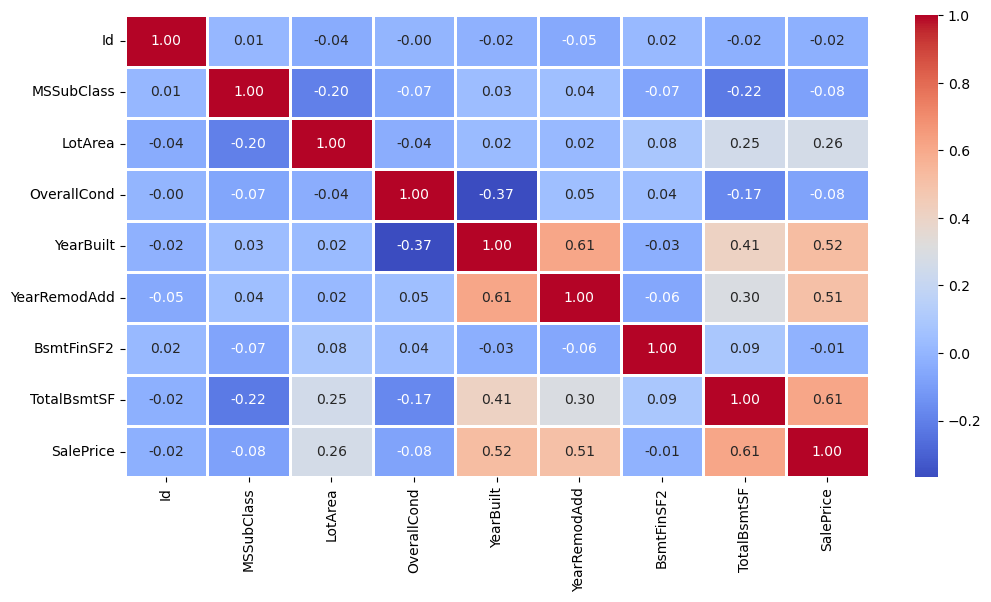

In [30]:
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap='coolwarm',
            fmt='.2f',
            linewidths =2,
            annot=True)

Kırmızıya yakın renkler pozitif korelasyonu gösterirken mavi renkler negatif korelasyonu ifade etmektedir.

* 1: Pozitif mükemmel korelasyon (değişkenler birbirine mükemmel şekilde paralel olarak hareket eder).
* -1: Negatif mükemmel korelasyon (değişkenler birbirinin tam tersi yönde hareket eder).
* 0: Korelasyon yok (değişkenler arasında herhangi bir doğrusal ilişki yoktur).

Örneğin, YearBuilt ve YearRemodAdd sütunları genellikle birbirine yüksek korelasyon gösterir, çünkü bir evin yapıldığı yıl ile tadilat tarihinin yakın olması muhtemeldir.

In [35]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

Şimdi her kategorik değişken için kaç unique değer olduğunu görelim.

C:\Users\dilar\AppData\Local\Temp\ipykernel_7448\3195003595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=object_cols,y=unique_values,palette='viridis')


<Axes: >

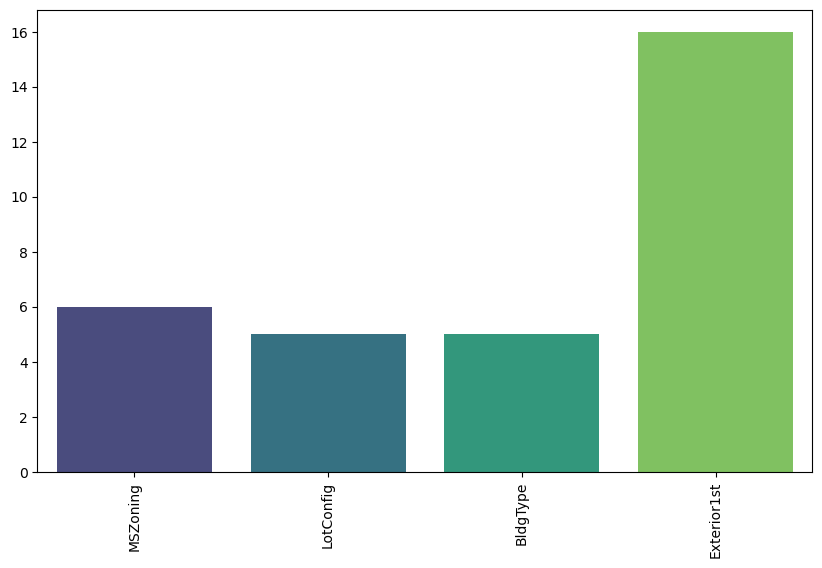

In [39]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values,palette='viridis')


Exterior1st kolonunun yaklaık 16 adet diğer kategorik değişkenlerinde yaklaşık 6 adet unique değer içerdiğini görüyoruz

C:\Users\dilar\AppData\Local\Temp\ipykernel_7448\2192331137.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette='viridis')
C:\Users\dilar\AppData\Local\Temp\ipykernel_7448\2192331137.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette='viridis')
C:\Users\dilar\AppData\Local\Temp\ipykernel_7448\2192331137.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette='viridis')
C:\Users\dilar\AppData\Local\Temp\ipykernel_7448\2192331137.py:10: FutureWarning: 

P

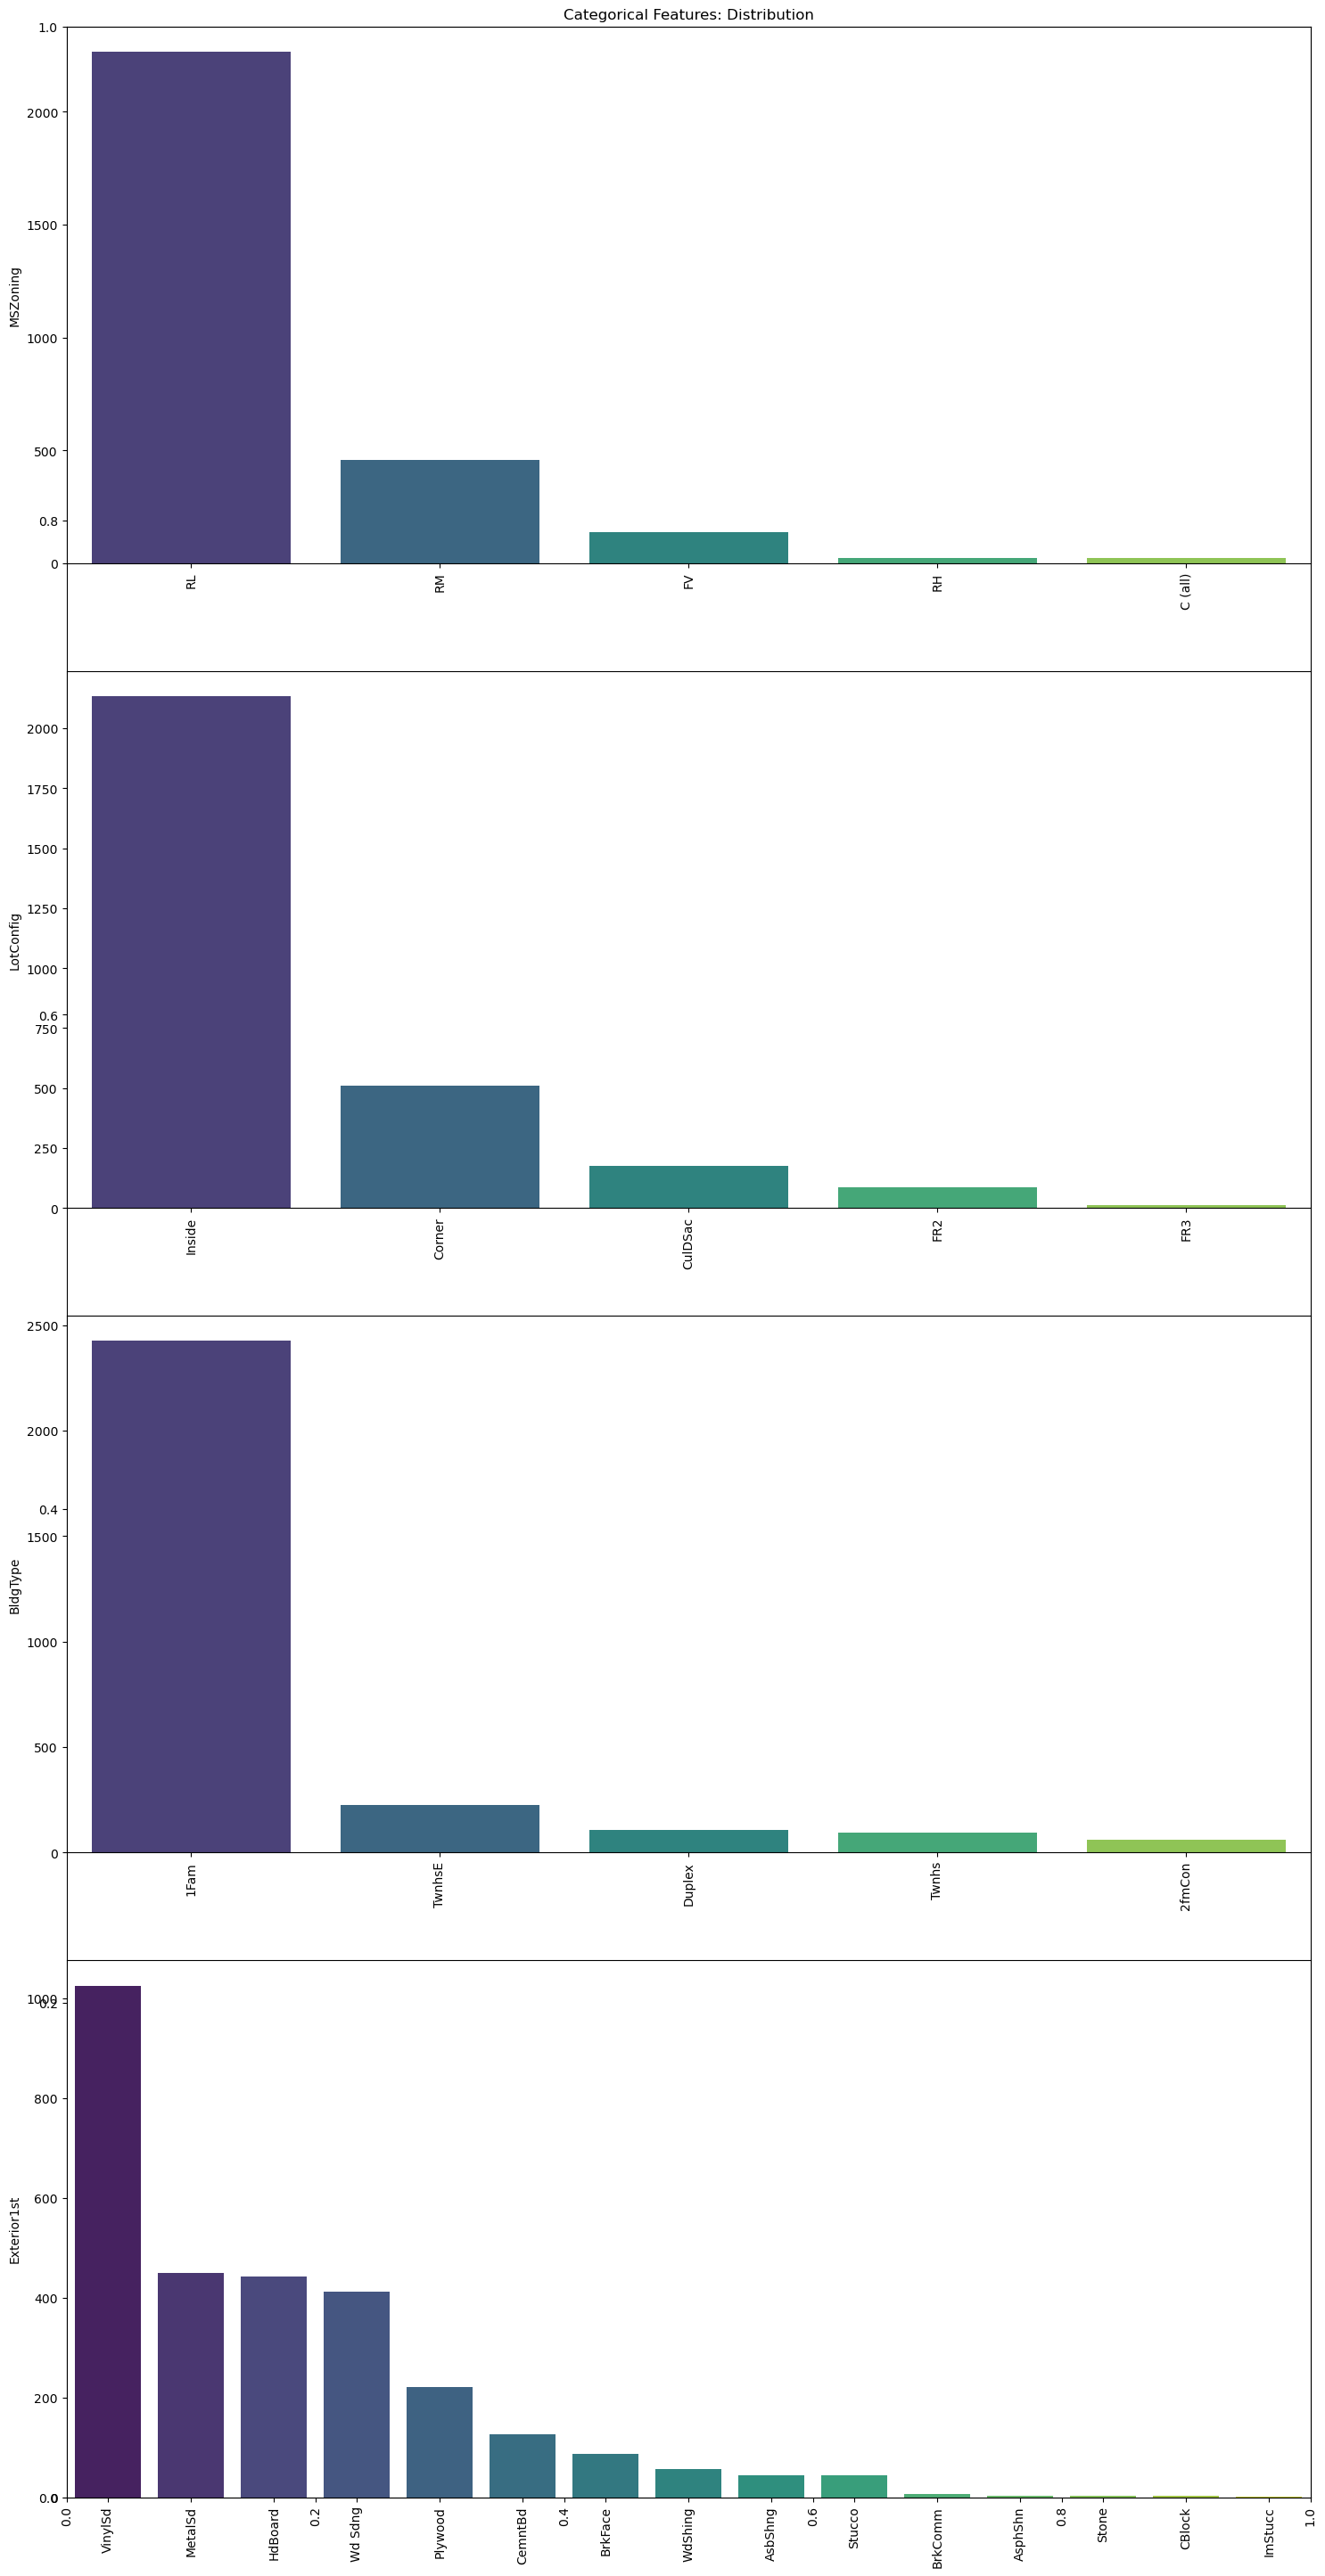

In [59]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(4 ,1, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, palette='viridis')
    index += 1


## Data Preprocessing

### Veri temizleme
Verisetinde model eğitimi için gerekli olmayan ve kaldırılması gereken kolonlar vardır. Bu sütunları drop etmemiz gerekiyor. 
Aynı zamanda verisetinde eksik/boş değer kontrolü yapmamız gerekiyor. Bu değerlerle başa çıkmak için 2 yöntem mevcuttur:
1. Eğer özellik veya kayıt çok önemli değilse sütunu/satırı doğrudan silebiliriz.
2. Boş değerleri verisetinin ihtiyacına göre ortalama, mod vb. değerlerle doldurabiliriz.

In [60]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

Id kolonu model için gerekli olmadığını için kaldırabiliriz.

In [61]:
df.drop(["Id"],axis=1,inplace=True)

In [62]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

SalePrice sütununda çok fazla eksik değer olduğunu görüyoruz. Bu kısımları ortalama değer ile doldurabiliriz. Diğer kolonalrın boş değer içeren kayıtlarının sayısı çok az olduğu için silebiliriz.

In [63]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [64]:
df=df.dropna()

In [65]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### Kategorik değerleri sayısal değerlere dönüştürme

OneHot Encoding, kategorik verileri ikili vektörlere dönüştürmenin en iyi yoludur. Bu, değerleri tamsayı değerlerine eşler. OneHotEncoder kullanarak , nesne verilerini kolayca int'e dönüştürebiliriz.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [76]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#sparse: sıkışık matris ya da dense matris ayarlaması için kullanılır
#handle_unknow:eğitim veri setinde olmayan bir kategori ile karşılaşıldığında ne yapılacağını belirtir. Burada ignore kullanılması, modelin bilinmeyen kategorilere karşı bir hata vermesini engeller ve bu durumda kategoriler için sıfır vektörler döndürür.
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)



In [78]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Eğitimi

In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X=df_final.drop(['SalePrice'],axis=1)
Y=df_final['SalePrice']

X_train,X_valid,Y_train,Y_valid = train_test_split(X, Y, train_size =0.8, test_size=0.2,random_state=0)

Modeli 3 farklı regresyon modeli ile eğiteceğiz.Bunlar:
* SVM
* Random Forest
* Linear Regression
Daha sonra her model için MAPE(Mean Absolute Percentage Error) değerini hesaplayacağız. Bu tahmin modellerinin doğruluğunu değerlendirmek için kullanılan bir hata ölçütüdür. MAPE, gerçek değerler ile tahmin edilen değerler arasındaki farkı yüzde cinsinden ifade eder ve modelin ne kadar hatalı olduğunu ifade eder.
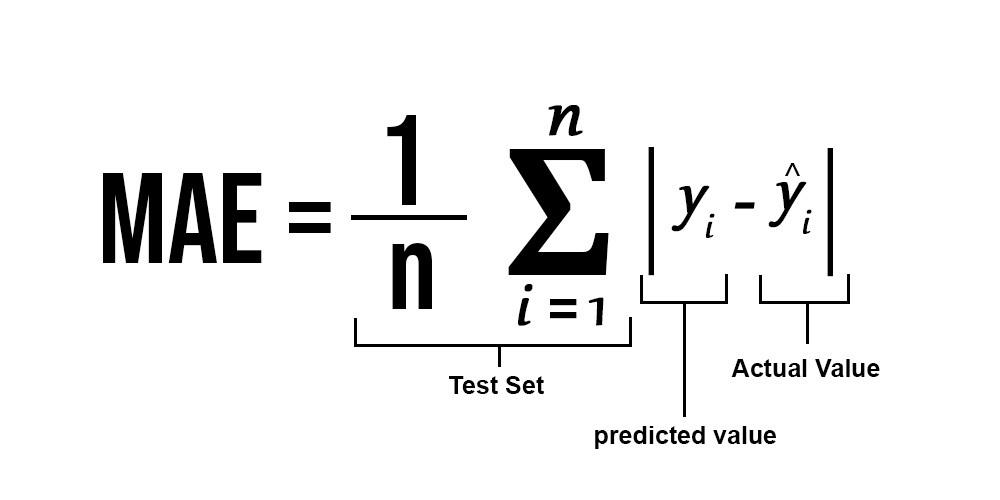

#### SVM

SVM, veriyi farklı sınıflara ayırmak için en iyi hiperdüzlemi (decision boundary) bulmaya çalışır. Bu hiperdüzlem, sınıfları birbirinden maksimum mesafede ayıran doğrusal veya doğrusal olmayan bir sınırdır.

In [84]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.1870512931870423


#### Random Forest 

Random Forest, çok sayıda karar ağacı (decision tree) oluşturur ve bu ağaçların ortalama tahminlerini (veya çoğunluk oylarını) alarak daha doğru ve stabil sonuçlar elde etmeye çalışır.

In [88]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.1914969278827547

### Linear Regression

Bu model, bağımsız değişkenler ile bağımlı değişken arasındaki en uygun doğrusal ilişkiyi bulmayı amaçlar. Kısacası, bir ya da daha fazla özellik (bağımsız değişken) ile bir hedef (bağımlı değişken) arasında doğrusal bir ilişki kurarak tahmin yapar.

In [89]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841600051


## SONUÇ
3 modelin hata oranları karşılaştırıldığında en başarılı modelin SVM olduğu görülmüştür.